<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Python_for_finance_O'reilly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chap 1

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
# Monte Carlo valuation of European call option
# in Black-Scholes-Merton model
# bsm_mcs_euro.py
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
import math
import numpy as np

# Parameter Values
S0 = 100.  # initial index level
K = 105.  # strike price
T = 1.0  # time-to-maturity
r = 0.05  # riskless short rate
sigma = 0.2  # volatility

I = 100000  # number of simulations

# Valuation Algorithm
z = np.random.standard_normal(I)  # pseudo-random numbers
# index values at maturity
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * z)
hT = np.maximum(ST - K, 0)  # payoff at maturity
C0 = math.exp(-r * T) * np.mean(hT)  # Monte Carlo estimator

# Result Output
print('Value of the European call option %5.3f.' % C0)

Value of the European call option 8.043.


In [ ]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

1 loop, best of 3: 1.13 s per loop


In [ ]:

import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

10 loops, best of 3: 126 ms per loop


In [ ]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

10 loops, best of 3: 111 ms per loop


In [ ]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

10 loops, best of 3: 91 ms per loop


# III. Financial data science

# Chap 7 Data visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

import cufflinks as cf
import plotly.offline as plyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

#plyo.init_notebook_mode(connected=True)

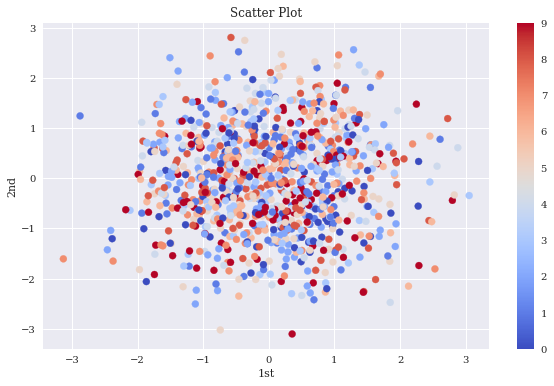

In [ ]:
y = np.random.standard_normal((1000, 2))
c = np.random.randint(0, 10, len(y))

plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1],
            c=c,  
            cmap='coolwarm',  
            marker='o')  
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot');
# plt.savefig('../../images/ch07/mpl_15')

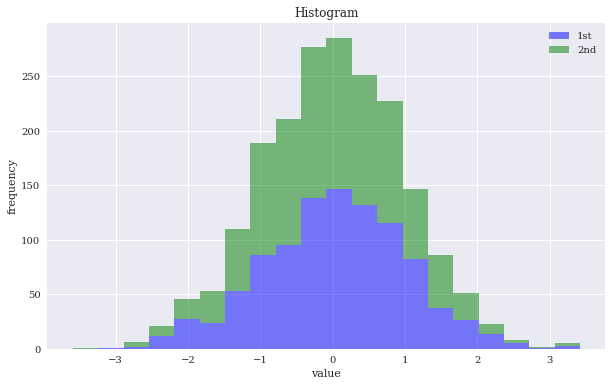

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
            stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

In [ ]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-1-1',  
                      freq='B',  
                      periods=len(a))
df = pd.DataFrame(100 + 5 * a,  
                  columns=list('abcde'),  
                  index=index)
df


,a,b,c,d,e
2019-01-01,103.314586,106.823331,105.584824,101.271706,100.910055
2019-01-02,96.409342,107.947419,107.697706,97.175791,85.600200
2019-01-03,94.032763,108.037322,110.375230,96.460050,82.366771
2019-01-04,99.475815,111.851467,119.116417,103.379958,89.112064
2019-01-07,95.233851,106.526039,122.560290,104.812579,97.630931
...,...,...,...,...,...
2019-12-10,48.313066,111.860707,117.707219,52.074648,-26.595410
2019-12-11,49.690154,111.923968,117.954063,50.066133,-27.595732
2019-12-12,46.484317,116.240120,118.752066,51.677662,-23.591694
2019-12-13,47.973521,121.234279,131.018599,56.169765,-25.932556


In [ ]:
plyo.iplot(  
    df.iplot(asFigure=True),  
    #image='png',  
    #filename='ply_01'  
)

In [ ]:
df.iplot(asFigure=True)

In [ ]:

plyo.iplot(
    df[['a', 'b']].iplot(asFigure=True,
             theme='polar',  
             title='A Time Series Plot',  
             xTitle='date',  
             yTitle='value',  
             mode={'a': 'markers', 'b': 'lines+markers'},  
             symbol={'a': 'circle', 'b': 'diamond'},  
             size=3.5,  
             colors={'a': 'blue', 'b': 'magenta'},  
                        ),
    #image='png',
    #filename='ply_02'
)

In [ ]:
plyo.iplot(
    df.iplot(kind='hist',  
             subplots=True,  
             bins=15,  
             asFigure=True),
    #image='png',
    #filename='ply_03'
)


Financial Plotting

In [ ]:
!pip install fxcmpy

     |████████████████████████████████| 204kB 6.6MB/s 
  Created wheel for socketIO-client: filename=socketIO_client-0.7.2-cp36-none-any.whl size=23706 sha256=1ba1625e3ba7abc90a0d8c007ed6450c11debb2d497874b38409016133ebfda7
  Stored in directory: /root/.cache/pip/wheels/bd/5d/9f/ebc0c223ec59641877c817eb10442627e69af88c126f1f53a8
Successfully built socketIO-client


In [ ]:
!pip install socketIO_client

In [ ]:
!pip install python-socketio

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 


In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.0MB/s 


In [ ]:
import importlib
import datetime as dt
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [ ]:

start = dt.datetime(2018, 2, 1)
end = dt.datetime(2018, 3, 15)
period='m1'
dr = cdr('EURUSD', start, end,period, verbosity=True)
dr.get_data().to_csv('fxcm_eur_usd_eod_data.csv')

Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/5.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/6.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/7.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/8.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/9.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/10.csv.gz
Fetching data from: https://candledata.fxcorporate.com/m1/EURUSD/2018/11.csv.gz


In [ ]:
start = dt.datetime(2017, 7, 1)
end = dt.datetime(2017, 11, 15)
period='D1'
dr = cdr('EURUSD', start, end,period, verbosity=True)
dr.get_data().info()

Fetching data from: https://candledata.fxcorporate.com/D1/EURUSD/2017.csv.gz
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 2017-01-02 22:00:00 to 2017-12-31 22:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   309 non-null    float64
 1   BidHigh   309 non-null    float64
 2   BidLow    309 non-null    float64
 3   BidClose  309 non-null    float64
 4   AskOpen   309 non-null    float64
 5   AskHigh   309 non-null    float64
 6   AskLow    309 non-null    float64
 7   AskClose  309 non-null    float64
dtypes: float64(8)
memory usage: 21.7 KB


In [ ]:
dr.get_data().head()

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
2017-01-02 22:00:00,1.05174,1.05174,1.03402,1.04048,1.05295,1.05295,1.03406,1.04065
2017-01-03 22:00:00,1.04048,1.04999,1.03897,1.04864,1.04065,1.05004,1.03897,1.04922
2017-01-04 22:00:00,1.04864,1.06152,1.04807,1.06050,1.04922,1.06155,1.04811,1.06085
2017-01-05 22:00:00,1.06050,1.06220,1.05250,1.05319,1.06085,1.06241,1.05251,1.05372
2017-01-07 22:00:00,1.05319,1.05319,1.05267,1.05291,1.05372,1.05372,1.05300,1.05319


In [ ]:
dr.get_data().iplot(asFigure=True)

In [ ]:
raw=dr.get_data()
quotes = raw[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']]
quotes = quotes.iloc[-60:]
quotes.tail()

,AskOpen,AskHigh,AskLow,AskClose
2017-12-25 22:00:00,1.18667,1.18791,1.18467,1.18587
2017-12-26 22:00:00,1.18587,1.19104,1.18552,1.18885
2017-12-27 22:00:00,1.18885,1.19592,1.18885,1.19426
2017-12-28 22:00:00,1.19426,1.20256,1.19369,1.20092
2017-12-31 22:00:00,1.20092,1.20144,1.19994,1.20144


During instantiation, the QuantFig object takes the DataFrame object as input
and allows for some basic customization. Plotting the data stored in the
QuantFig object qf then happens with the qf.iplot() method (see Figure 7-
25):

In [ ]:
qf = cf.QuantFig(
quotes,
title='EUR/USD Exchange Rate',
legend='top',
name='EUR/USD'
)

In [ ]:
plyo.iplot(
qf.iplot(asFigure=True),
#image='png',
#filename='qf_01'
)

In [ ]:
qf.add_bollinger_bands(periods=15,
boll_std=2)
qf.iplot(asFigure=True)

In [ ]:
qf.add_rsi(periods=14,
showbands=False)
qf.iplot(asFigure=True)

# Chap 8. Financial Time Series

In [24]:
import numpy as np
import pandas as pd
import cufflinks as cf
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/source/tr_eikon_eod_data.csv',  
                   index_col=0, 
                   parse_dates=True)
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [3]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01d1229cf8>,
      dtype=object)

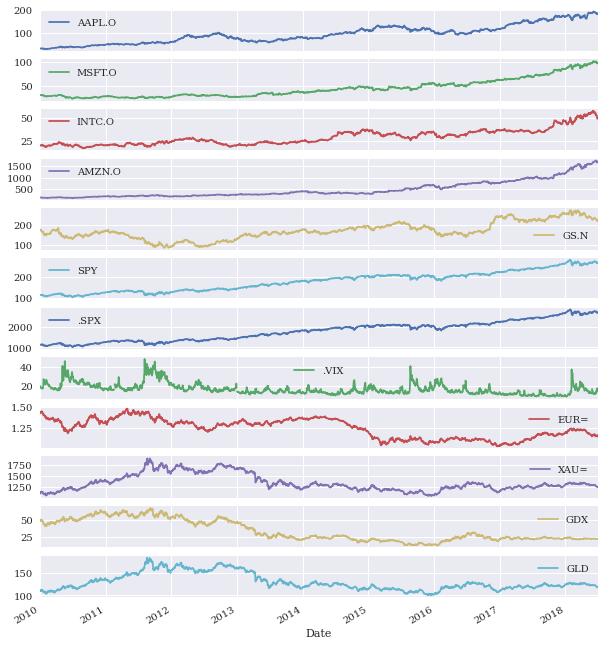

In [4]:
data.plot(figsize=(10, 12), subplots=True)

The data used is from the Thomson Reuters (TR) Eikon Data API. In the TR
world symbols for financial instruments are called Reuters Instrument Codes
(RICs). The financial instruments that the single RICs represent are:

In [5]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [6]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [8]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [9]:
data.mean()

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [10]:
data.aggregate([min,
              np.mean,
              np.std,
              np.median,
              max]
              ).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


Changes over Time

Statistical analysis methods are often based on changes over time and not the
absolute values themselves. There are multiple options to calculate the
changes in a time series over time, including absolute differences, percentage
changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [11]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [12]:
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [13]:
data.diff().mean()

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage
changes are usually preferred. The following code derives the percentage
changes or percentage returns (also: simple returns) in a financial context and
visualizes their mean values per column (see Figure 8-2):

In [14]:
data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


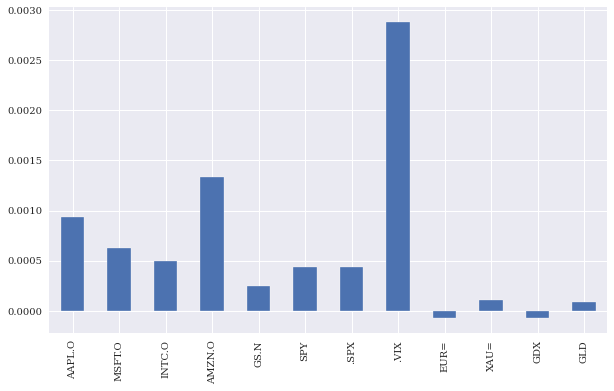

In [25]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some
scenarios, they are easier to handle and therefore often preferred in a financial
context.2 Figure 8-3 shows the cumulative log returns for the single financial
time series. This type of plot leads to some form of normalization:

In [26]:
rets = np.log(data / data.shift(1))
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


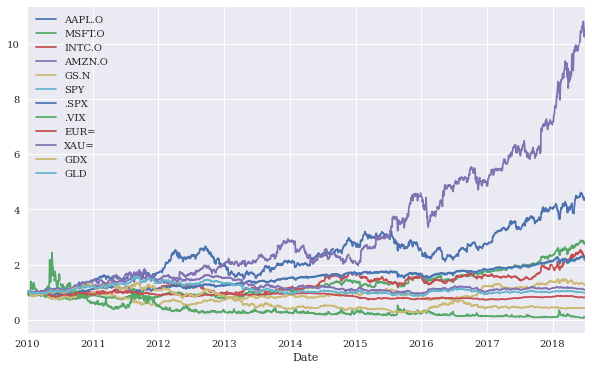

In [27]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

Resampling

Resampling is an important operation on financial time series data. Usually
this takes the form of downsampling, meaning that, for example, a tick data
series is resampled to one-minute intervals or a time series with daily
observations is resampled to one with weekly or monthly observations (as
shown in Figure 8-4):

In [31]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [29]:
data.resample('1w', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [32]:
data.resample('1m', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


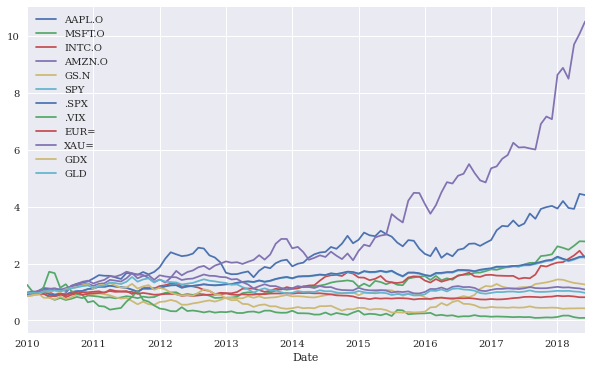

In [33]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
).plot(figsize=(10, 6));